## What are we going to cover
* get  a vision dataset from torchvision.datasets
* architecture of a CNN with PyTorch
* An end to end multi-class image classification problem
* steps in modelling with CNNs in pytorch
    * Creating a CNN model with PyTorch
    * Picking a Loss and optimizer
    * Training a model a model
    * Evaluating a model

## Computer Vision Libraries
* `torchvision` -base domain library for  computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data(images)  to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch (creates custom data with your own datasets)
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
#import libraries
import torch
from torch import nn


#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # `ToTensor` --> Convert a PIL image or numpy.ndarray to tensor


#import matplotlib
import matplotlib.pyplot as plt


#Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


## Getting a Dataset
The dataset we are going to use is -- **`FashionMNIST`** from torchvison.datasets-


In [2]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download data to
    train = True, # do we want the training dataset? if train = False it will upload the test dataset
    download = True, #do we want to download the data? (Yes/No)
    transform = ToTensor(), #how do we want to transform the data
    # `transform` convert the pil image or np.ndarray into pytorch, it converts the image (H*W*C) in the range [0,255] to 
    # a torch.FloatTensor of shape (C*W*H) in the range [0.0,1]
    target_transform =None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
#see the first training example:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
type(image)

torch.Tensor

In [6]:
image.dtype

torch.float32

In [7]:
# Different types of images that contains in the dataset
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
#check the shape of our image
print(f"The shape of our image: {image.shape}-->[color channels, height, width]")
print(f" Image label: {class_names[label]}")

The shape of our image: torch.Size([1, 28, 28])-->[color channels, height, width]
 Image label: Ankle boot


## Visualizing our data

Image shape: torch.Size([1, 28, 28])


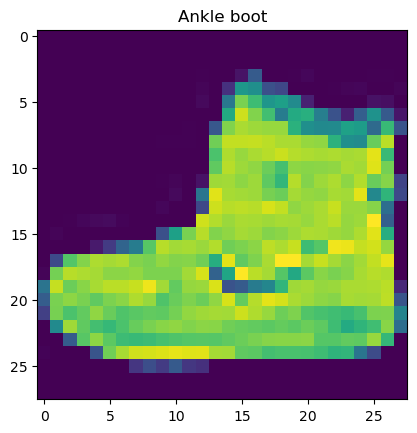

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.title(class_names[label])
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

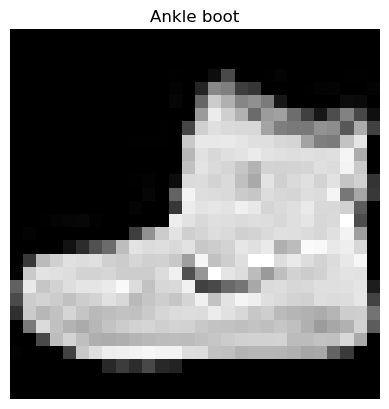

In [12]:
#gray mapping images
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label])
plt.axis("off")

In [13]:
#plot more images
torch.manual_seed(42)

fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


<Figure size 900x900 with 0 Axes>

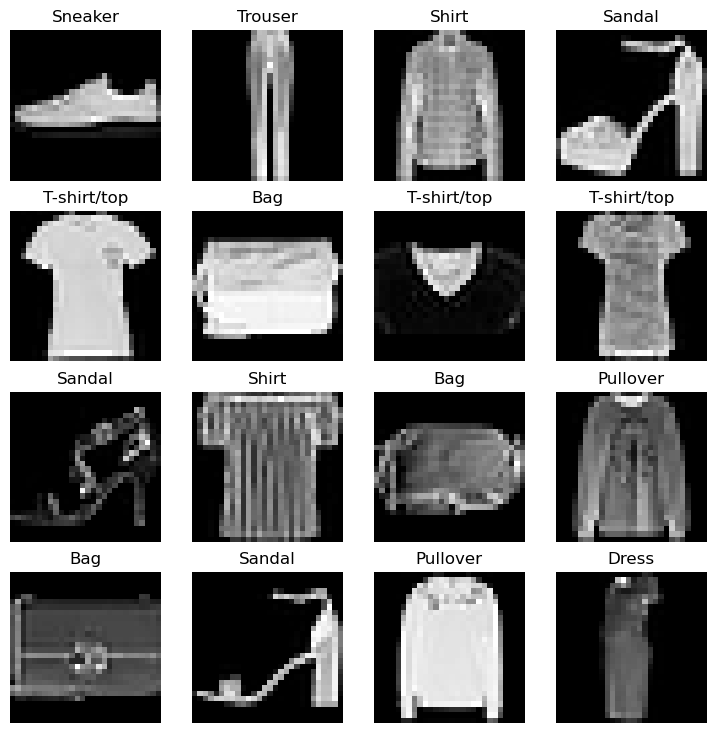

In [22]:
#torch.manual_seed(42)

fig = plt.figure(figsize = (9,9))
rows ,cols = 4,4
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0,len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);
    
    

In [23]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader

Right now, our data is in the from of PyTorch Datasets

DataLoader turns our dataset into a PyTorch iterable

More specifically, we want to turn our data into batches(mini batches)



In [25]:
from torch.utils.data.dataloader import DataLoader

#batch size
BATCH_SIZE = 32

#turn datasets into iterable(batches)
train_dataloader = DataLoader(dataset = train_data,
                        batch_size = BATCH_SIZE,
                        shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                        batch_size = BATCH_SIZE,
                        shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x144ead9d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1450ac610>)

In [27]:
#check out the status 

print(f" DataLoaders: {train_dataloader,test_dataloader}")
print(f" Length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f" Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

 DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x144ead9d0>, <torch.utils.data.dataloader.DataLoader object at 0x1450ac610>)
 Length of train dataloader : 1875 batches of 32
 Length of test dataloader : 313 batches of 32


In [29]:
#check out what's inside of the train_DataLoader
train_dataloader.batch_sampler

In [39]:
#check out what's inside the train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape #train_labels_batch represents the associted number of target values inside of a batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [43]:
train_labels_batch.unique()


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [45]:
type(train_features_batch)

torch.Tensor

In [46]:
print(train_features_batch.squeeze())

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [53]:
len(train_features_batch)

32

The representation of 13th image 


(-0.5, 27.5, 27.5, -0.5)

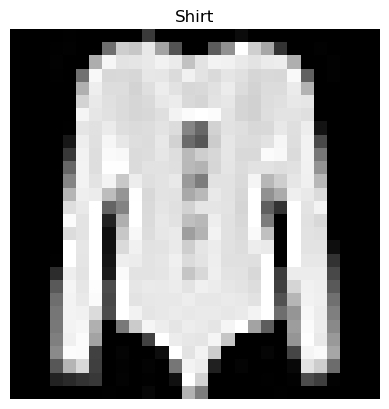

In [57]:
#show a sample of a particular batch

random_idx = torch.randint(0,len(train_features_batch),size =[1]).item()
image, label = train_features_batch[random_idx],train_labels_batch[random_idx]

#got the image and the associated label
print(f"The representation of {random_idx}th image ")
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)


## Baseline Model with two Linear Layers

when starting to build a series of ML modelling experiments, it's best practice to start with a baseline model. 

A baseline model is a simple model you willl try and improve upon with subsequent models/experiments. 

In other words: Start simply and add complexity when necessary

In [58]:
# Create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#flatten the sample
output = flatten_model(x) # performs the forward pass

#print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [60]:
x.squeeze(), output.squeeze()

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0118, 0.0000, 0.0000, 0.1961, 0.5843, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [65]:
a = torch.rand((2,3,3)) -->#height, length, width
a,a.shape

(tensor([[[0.3139, 0.4654, 0.1612],
          [0.1568, 0.2083, 0.3289],
          [0.1054, 0.9192, 0.4008]],
 
         [[0.9302, 0.6558, 0.0766],
          [0.8460, 0.3624, 0.3083],
          [0.0850, 0.0029, 0.6431]]]),
 torch.Size([2, 3, 3]))

In [66]:
flat_a = flatten_model(a) --> #height, length*width
flat_a,flat_a.shape

(tensor([[0.3139, 0.4654, 0.1612, 0.1568, 0.2083, 0.3289, 0.1054, 0.9192, 0.4008],
         [0.9302, 0.6558, 0.0766, 0.8460, 0.3624, 0.3083, 0.0850, 0.0029, 0.6431]]),
 torch.Size([2, 9]))

In [67]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int, 
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features= hidden_units),
            nn.Linear(in_features = hidden_units,
                     out_features = output_shape)
        )


    def forward(self, x):
        return self.layer_stack(x)
    

In [70]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units = 10, 
    output_shape = len(class_names)
)

model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [68]:
#device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

# Loss Function and Optimizer
* `Loss Function` - nn.CrossEntropyLoss()
*  `optimizer` - torch.optim.SGD
*  `Evaluation Matrix` - Accuracy

In [71]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_0.parameters(),
                           lr = 0.01)

from torchmetrics import Accuracy
acc_fn = Accuracy(task = 'Multiclass',
                  num_classes = 10
                 ).to(device)
acc_fn

MulticlassAccuracy()

In [78]:
#download the py file
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download ....")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
        print("download Complete")
        

download Complete


In [79]:
from helper_functions import accuracy_fn

In [81]:
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

## Creating a funtion to time our experiments

Machine learning is very experimental

2 of the main things you'll often want to track are:
1. Model's performance
2. How fast it runs

In [84]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):

    """Prints difference between start and end time. """
    total_time = end-start
    print(f"Train time on {device}: {total_time} seconds")
    return total_time

In [90]:
start_time = timer()
#some code
end_time = timer()
total_time = print_train_time(start_time,end_time,device = device)

Train time on mps: 5.1208997319918126e-05 seconds


In [91]:
start_time = timer()
#some code
end_time = timer()
total_time = print_train_time(start_time,end_time,device = "cpu")

Train time on cpu: 2.4791996111162007e-05 seconds


In [2]:
#create a person class
class Person():
    def __init__(self,name,age,height,occupation):
        self.name = name
        self.age = age
        self.height = height
        self.occupation = occupation
    def bmi_calculation(self):
        return self.height/self.age

In [3]:
p1 = Person('tinon',26,168,'student')
p2 = Person('tripto',20,148,'service holder')

In [4]:
p1.name

'tinon'

In [5]:
p1.bmi_calculation()

6.461538461538462

In [6]:
p2.bmi_calculation()

7.4

In [7]:
p2.occupation

'service holder'

In [18]:
class Employee(Person):
    def __init__(self,salary,job_description):
        super().__init__('t',42,145,'service holder')
        self.salary = salary
        self.job_description = job_description
    def retirement(self):
        if self.age>60:
            print('time to retirement')
        else:
            print('kaj kore kha')

In [20]:
employee1 = Employee(70,'programmer')

In [21]:
employee1.retirement()

kaj kore kha


In [22]:
help(Employee)

Help on class Employee in module __main__:

class Employee(Person)
 |  Employee(salary, job_description)
 |  
 |  Method resolution order:
 |      Employee
 |      Person
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, salary, job_description)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  retirement(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Person:
 |  
 |  bmi_calculation(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Person:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

